
##First Expirement



###Installing Software

In [1]:
pip install tqdm boto3 requests regex sentencepiece sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 10.1 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=ad3f184e9245a876d909410b692681815b89703a10f0d35d3a8f9be438f6a4da
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses


In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.7 MB/s eta 0:00:00


In [3]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00


###Preprocessing Data

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import transformers
import re
import torch
import tensorflow

In [137]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [138]:
train_data

,Unnamed: 0,Sentences,Sentiment
0,0,Working with one of the best Shakespeare sourc...,0
1,1,"Well...tremors I, the original started off in ...",0
2,2,Ouch! This one was a bit painful to sit throug...,0
3,3,"I've seen some crappy movies in my life, but t...",0
4,4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...,...
1995,1995,"Without ""mental anachronism"", this film which ...",1
1996,1996,This movie is just great. It's entertaining fr...,1
1997,1997,I've seen the original English version on vide...,1
1998,1998,"Hello, I was alanrickmaniac. I'm a Still Crazy...",1


In [139]:
test_data

,Unnamed: 0,Sentences,Sentiment
0,0,Alan Rickman & Emma Thompson give good perform...,0
1,1,I have seen this movie and I did not care for ...,0
2,2,"In Los Angeles, the alcoholic and lazy Hank Ch...",0
3,3,"This film is bundled along with ""Gli fumavano ...",0
4,4,I only comment on really very good films and o...,0
...,...,...,...
495,495,So after years and years I finally track this ...,1
496,496,I'm astonished how a filmmaker notorious for h...,1
497,497,We all enjoyed the movie. It is a very charmin...,1
498,498,"Fascinating and amusingly bad, Lights of New Y...",1


In [140]:
train_texts, train_labels = train_data["Sentences"], train_data["Sentiment"]
test_texts, test_labels = test_data["Sentences"], test_data["Sentiment"]
len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(2000, 2000, 500, 500)

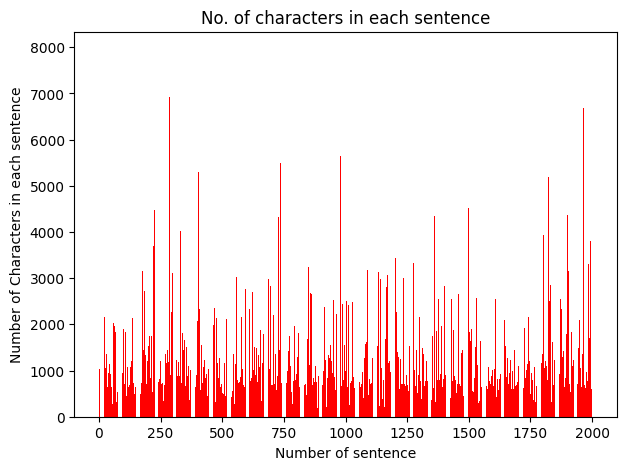

In [141]:
sentences = [len(sent) for sent in train_texts]

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.bar(range(1,2001), sentences, color = ['red'])
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence');

###Start Tokenization

In [142]:
from transformers import BertTokenizer
tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [143]:
tokenizer.tokenize('Hi my name is Atul')

['hi', 'my', 'name', 'is', 'at', '##ul']

In [144]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], test_texts))

len(train_tokens), len(test_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (1013 > 512). Running this sequence through the model will result in indexing errors


(2000, 500)

In [145]:
from keras_preprocessing.sequence import pad_sequences
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape


((2000, 512), (500, 512))

In [146]:
print(train_tokens_ids)

[[  101  2551  2007 ...     0     0     0]
 [  101  2092  1012 ...     0     0     0]
 [  101 15068  2818 ...     0     0     0]
 ...
 [  101  1045  1005 ...     0     0     0]
 [  101  7592  1010 ...     0     0     0]
 [  101  1999  2070 ... 10021  2066   102]]


In [147]:
train_y = np.array(train_labels) == 1
test_y = np.array(test_labels) == 1
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)

((2000,), (500,), 0.5, 0.5)

In [148]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]

In [149]:
print(train_masks)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [150]:
from torch import nn
from transformers import BertModel

class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        outputs = self.bert(tokens, attention_mask=masks, return_dict=True)
        pooled_output = outputs.pooler_output
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [151]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [152]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'4414.872576M'

In [153]:
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()     # running BERT on CUDA_GPU

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [154]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'4868.232704M'

In [155]:
x = torch.tensor(train_tokens_ids[:3]).to(device)
y = bert_clf.bert(x)
pooled = y.pooler_output
x.shape, pooled.shape

(torch.Size([3, 512]), torch.Size([3, 768]))

In [156]:
y = bert_clf(x)
y.cpu().detach().numpy()        # kinda Garbage Collector to free up used and cache space

array([[0.5806043 ],
       [0.58440447],
       [0.5574226 ]], dtype=float32)

In [157]:
# Cross- checking CUDA GPU Memory to ensure GPU memory is not overflowing.
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'7606.722048M'

In [158]:
y, x, pooled = None, None, None
torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'7606.722048M'

###Fine Tune Bert

In [27]:
# Setting hyper-parameters

BATCH_SIZE = 4
EPOCHS = 10

In [28]:
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)

str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'1646.39488M'

In [29]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [30]:
param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

In [31]:
from torch.optim import Adam
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

In [32]:
torch.cuda.empty_cache()   # Clearing Cache space for a fresh Model run

In [33]:
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()

        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()
        

        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / BATCH_SIZE, train_loss / (step_num + 1)))

Epoch:  10
499/500.0 loss: 0.027978557712049223 


In [34]:
bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])

In [172]:
from sklearn.metrics import classification_report
print(classification_report(test_y, bert_predicted))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91       250
        True       0.92      0.91      0.91       250

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



###Confusion Matrix Test Data


In [132]:
wrong = {"z_o" : [], "o_z": []}
true = {"z": [], "o": []}
i = 0
for a,b in zip(bert_predicted,test_y):
  if a == 0 and b == 1: #false positive
    wrong["z_o"].append(i)
  elif a == 1 and b == 0: #false negative
    wrong["o_z"].append(i)
  elif a == 0 and b == 0:
    true["z"].append(i)
  elif a == 1 and b == 1:
    true["o"].append(i)
  i += 1
print(len(wrong["z_o"]), len(wrong["o_z"]))
print(len(true["z"]), len(true["o"]))

22 21
229 228


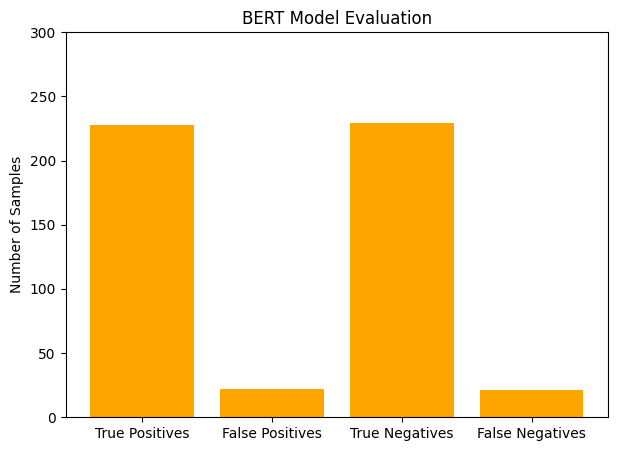

In [135]:
import matplotlib.pyplot as plt

# Data
false_positives = len(wrong["z_o"])
false_negatives = len(wrong["o_z"])
true_positives = len(true["o"])
true_negatives = len(true["z"])

# Plotting
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [true_positives, false_positives, true_negatives, false_negatives]
colors = ['orange', 'orange', 'orange', 'orange'] # Set the color of all bars to orange
plt.bar(labels, values, color=colors)

# Customization
plt.title('BERT Model Evaluation')
plt.ylabel('Number of Samples')
plt.ylim(top=300) # Set the y-axis limit to avoid overlapping with title
plt.show()

In [37]:
import random as rand
false_positive_index = rand.choice(wrong["z_o"])
false_negative_index= rand.choice(wrong["o_z"])

min = 1000000
best_i = 0
for i in wrong["o_z"]:
  if len(test_data.iloc[i]["Sentences"]) < min:
    min = len(test_data.iloc[i]["Sentences"])
    best_i = i

print(false_positive_index)
print(false_negative_index)
print(best_i)

313
20
78


###False positive

In [38]:
false_positive_sentence = test_data.iloc[365]["Sentences"]
false_negative_sentence = test_data.iloc[78]["Sentences"]
print(false_positive_sentence)
print(false_negative_sentence)
print(len(false_positive_sentence), len(false_negative_sentence))

I know it was supposed to be a long walk, but really!!!!The costumes were a bit yuk, but still... it was the 1970's I suppose!!!It was a bit long and dull, so give me the newer version any day!
Nice movie and Nicholle Tom does a fantastic job playing the "guy in the girl's body", she really does it well.A sort of teen version of many other movies, but well done.Well casted, from "Matt" to "Matt2".
193 206


In [39]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_pos_sentence = tokenizer.encode_plus(
                        false_positive_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_pos_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_pos_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_pos_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])


[[101, 1045, 2113, 2009, 2001, 4011, 2000, 2022, 1037, 2146, 3328, 1010, 2021, 2428, 999, 999, 999, 999, 1996, 12703, 2020, 1037, 2978, 9805, 2243, 1010, 2021, 2145, 1012, 1012, 1012, 2009, 2001, 1996, 3359, 1005, 1055, 1045, 6814, 999, 999, 999, 2009, 2001, 1037, 2978, 2146, 1998, 10634, 1010, 2061, 2507, 2033, 1996, 10947, 2544, 2151, 2154, 999, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [40]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[  101,  1045,  2113,  2009,  2001,  4011,  2000,  2022,  1037,  2146,
          3328,  1010,  2021,  2428,   999,   999,   999,   999,  1996, 12703,
          2020,  1037,  2978,  9805,  2243,  1010,  2021,  2145,  1012,  1012,
          1012,  2009,  2001,  1996,  3359,  1005,  1055,  1045,  6814,   999,
           999,   999,  2009,  2001,  1037,  2978,  2146,  1998, 10634,  1010,
          2061,  2507,  2033,  1996, 10947,  2544,  2151,  2154,   999,   102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [41]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'modelForSequenceClassification', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading




#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights 

In [42]:
output_attentions_all = pred[-1]
heads = output_attentions_all[1].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
for e in heads:
  # print(e[0])
  if i == 1:
    best_layer = e[:, 0]
  i += 1

for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
  if(b > 0.50):
    print(a,b)
# tokenizer.convert_ids_to_tokens(temp[0])


supposed 0.5422712
walk 0.5339563
! 0.72527856
! 0.5069556
! 0.50998396
! 0.69737077
costumes 0.7250118
##k 0.6277071
. 0.86033
suppose 0.6205887
! 0.6847859
! 0.65232134
! 0.9295672
dull 0.654904
me 0.51890785
version 0.84417266
[SEP] 0.8130754


In [43]:
pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 9.5 MB/s eta 0:00:00


In [44]:
def visualize_token2token_scores(scores_mat, x_label_name='Head', all_tokens = encoded_false_pos_sentence['input_ids'] ):
    fig = plt.figure(figsize=(20, 20))

    for idx, scores in enumerate(scores_mat):
        scores_np = np.array(scores)
        ax = fig.add_subplot(4, 3, idx+1)
        # append the attention weights
        im = ax.imshow(scores, cmap='viridis')

        fontdict = {'fontsize': 10}

        ax.set_xticks(range(len(all_tokens)))
        ax.set_yticks(range(len(all_tokens)))

        ax.set_xticklabels(range(len(all_tokens)), fontdict=fontdict, rotation=90)
        ax.set_yticklabels(range(len(all_tokens)), fontdict=fontdict)
        ax.set_xlabel('{} {}'.format(x_label_name, idx+1))

        fig.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

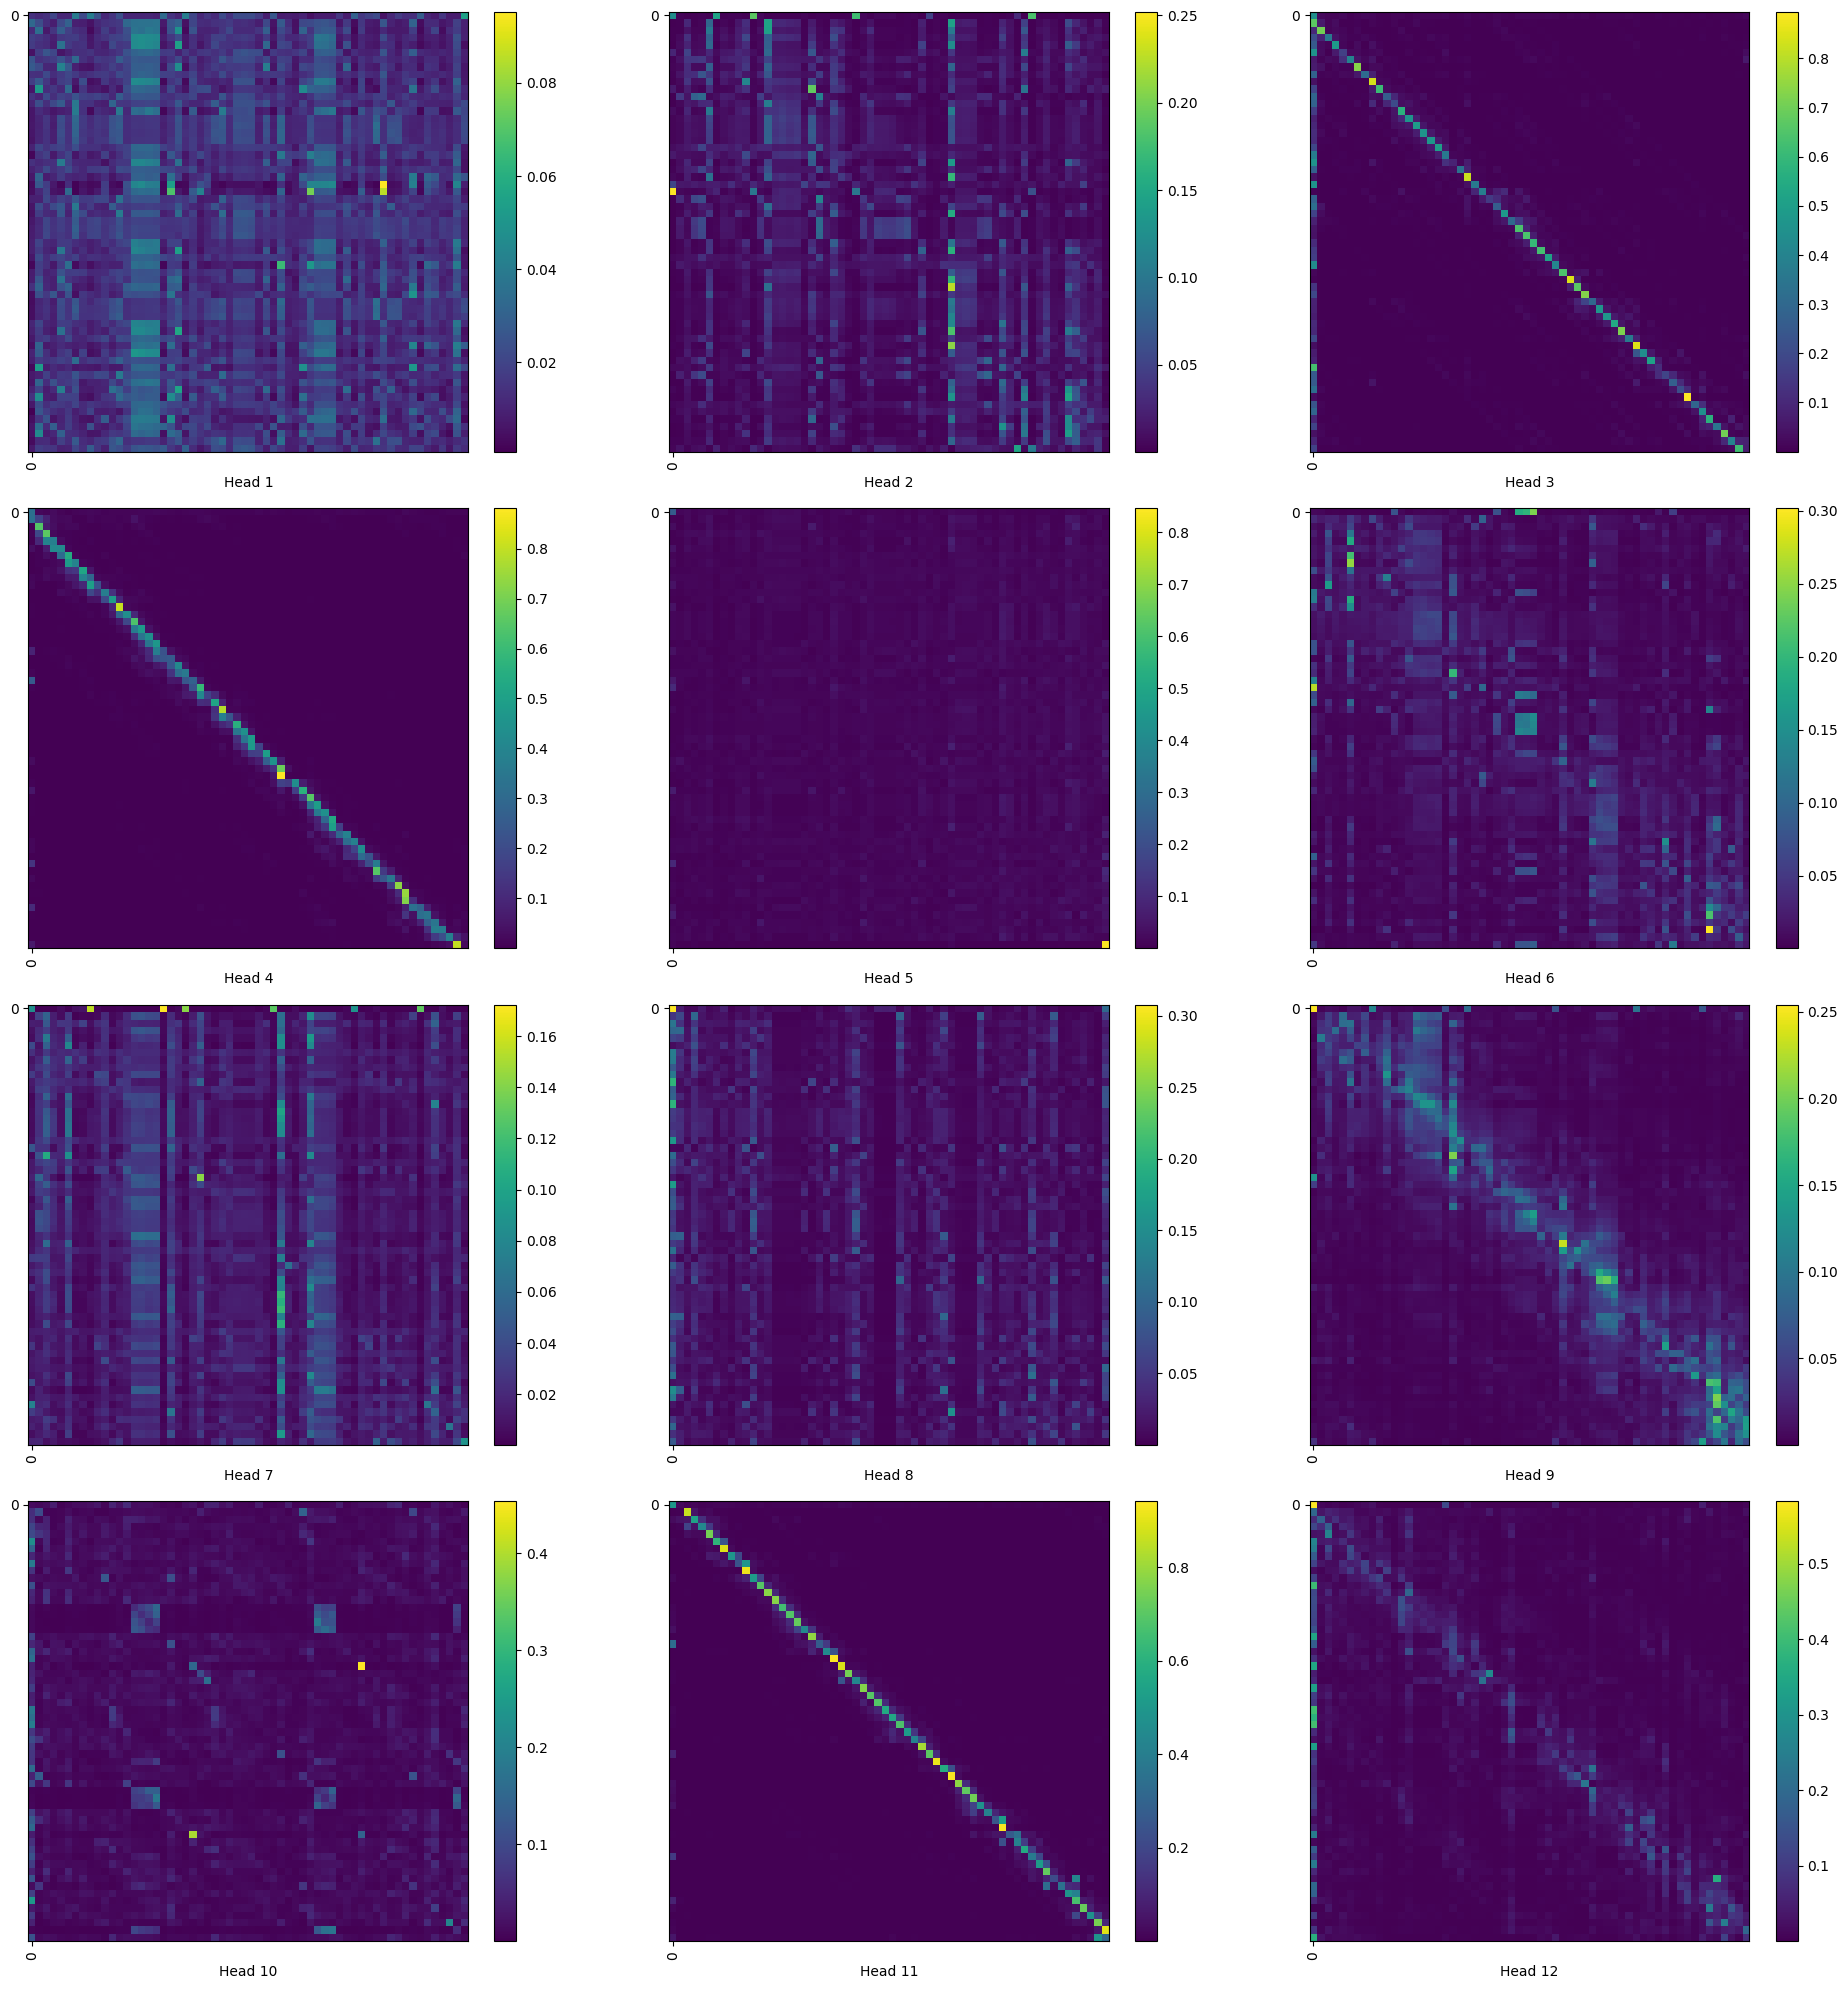

In [45]:
visualize_token2token_scores(output_attentions_all[0].squeeze().detach().cpu().numpy())

###False Negative

In [46]:
false_negative_sentence = test_data.iloc[78]["Sentences"]
print(false_negative_sentence)
print(len(false_negative_sentence))

Nice movie and Nicholle Tom does a fantastic job playing the "guy in the girl's body", she really does it well.A sort of teen version of many other movies, but well done.Well casted, from "Matt" to "Matt2".
206


In [47]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_neg_sentence = tokenizer.encode_plus(
                        false_negative_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_neg_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_neg_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_neg_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])

[[101, 3835, 3185, 1998, 27969, 14854, 2571, 3419, 2515, 1037, 10392, 3105, 2652, 1996, 1000, 3124, 1999, 1996, 2611, 1005, 1055, 2303, 1000, 1010, 2016, 2428, 2515, 2009, 2092, 1012, 1037, 4066, 1997, 9458, 2544, 1997, 2116, 2060, 5691, 1010, 2021, 2092, 2589, 1012, 2092, 14542, 2094, 1010, 2013, 1000, 4717, 1000, 2000, 1000, 4717, 2475, 1000, 1012, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [48]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[  101,  3835,  3185,  1998, 27969, 14854,  2571,  3419,  2515,  1037,
         10392,  3105,  2652,  1996,  1000,  3124,  1999,  1996,  2611,  1005,
          1055,  2303,  1000,  1010,  2016,  2428,  2515,  2009,  2092,  1012,
          1037,  4066,  1997,  9458,  2544,  1997,  2116,  2060,  5691,  1010,
          2021,  2092,  2589,  1012,  2092, 14542,  2094,  1010,  2013,  1000,
          4717,  1000,  2000,  1000,  4717,  2475,  1000,  1012,   102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [49]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'modelForSequenceClassification', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading




#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights 

In [50]:
output_attentions_all = pred[-1]
heads = output_attentions_all[1].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
for e in heads:
  # print(e[0])
  if i == 10:
    best_layer = e[:, 0]
  i += 1

for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
  if(b > 0.35):
    print(a,b)
# tokenizer.convert_ids_to_tokens(temp[0])

[CLS] 0.39295417
nice 0.58227855
movie 0.35280845
nic 0.8318887
##hol 0.64525044
tom 0.42713115
fantastic 0.6408408
she 0.4214338
caste 0.7785773
matt 0.6528449
matt 0.7316552
##2 0.5730306
[SEP] 0.89068407


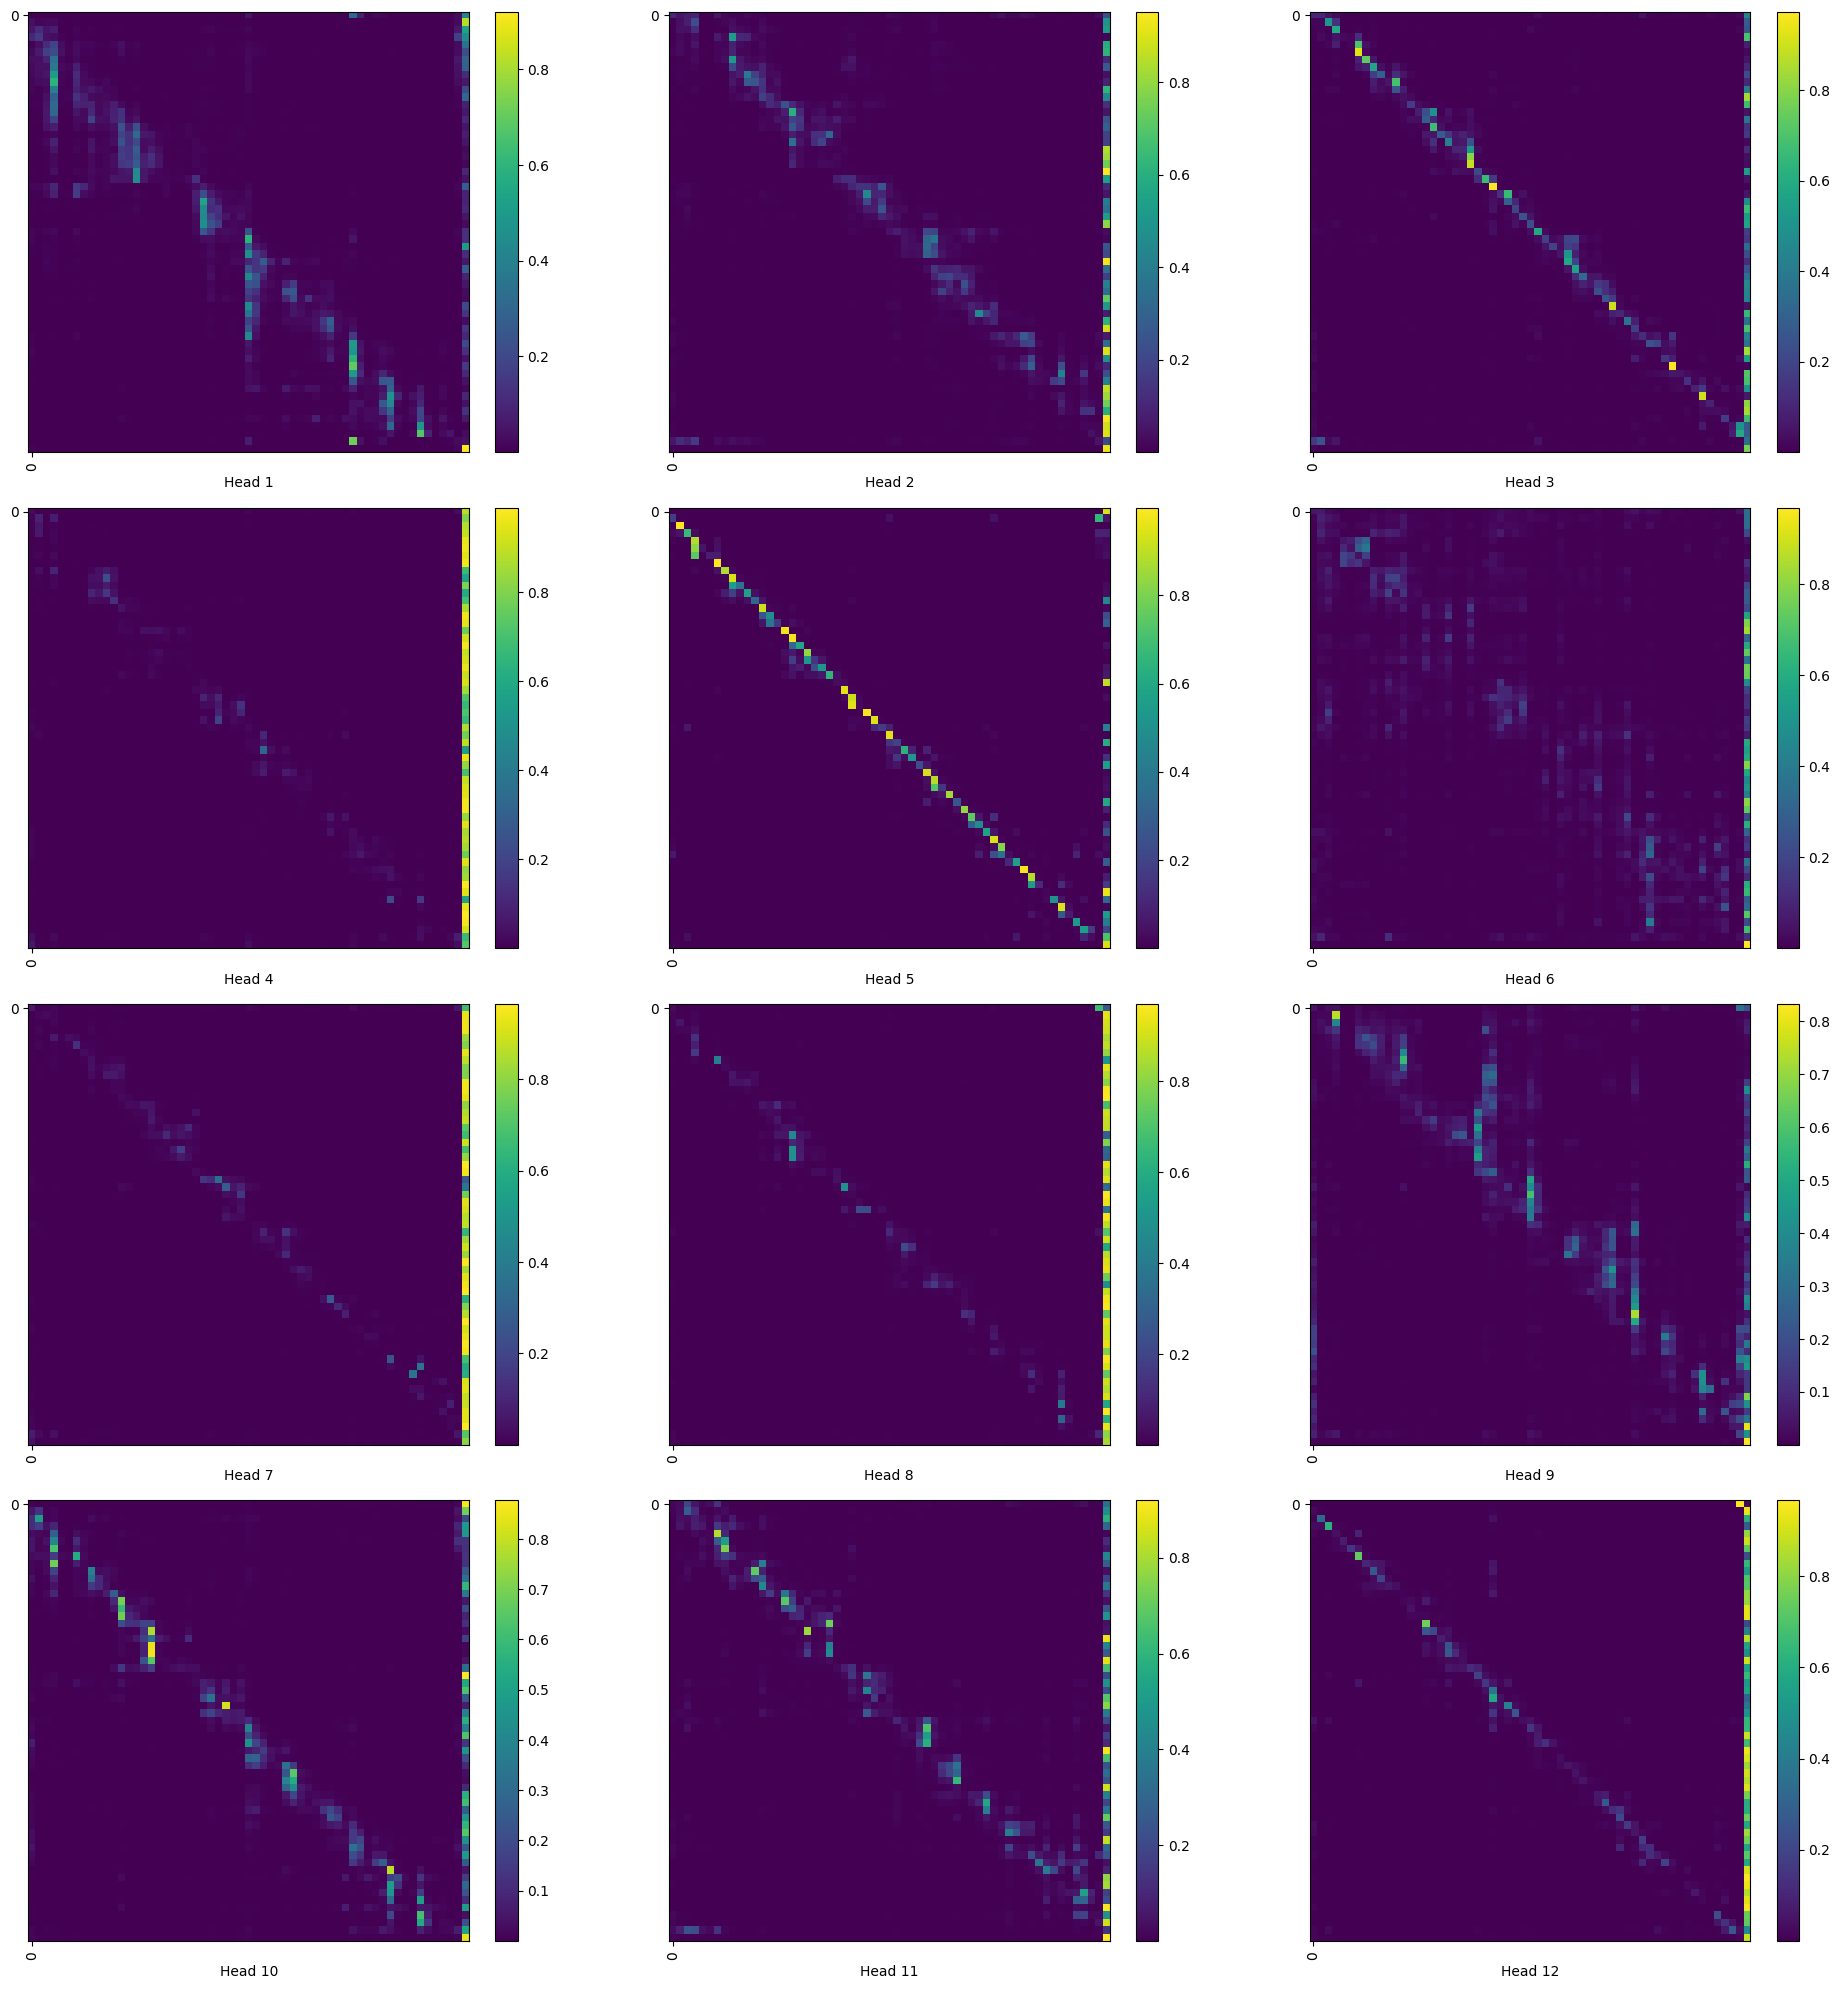

In [51]:
visualize_token2token_scores(output_attentions_all[7].squeeze().detach().cpu().numpy())

###True Positive

In [52]:
min = 1000000
best_i = 0
for i in true["o"]:
  if len(test_data.iloc[i]["Sentences"]) < min:
    min = len(test_data.iloc[i]["Sentences"])
    best_i = i

print(best_i)


336


In [53]:
import random as rand
true_positive_index = best_i
true_positive_sentence = test_data.iloc[true_positive_index]["Sentences"]
print(true_positive_sentence)

This is a great movie. Too bad it is not available on home video.


In [54]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_pos_sentence = tokenizer.encode_plus(
                        true_positive_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_pos_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_pos_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_pos_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])

[[101, 2023, 2003, 1037, 2307, 3185, 1012, 2205, 2919, 2009, 2003, 2025, 2800, 2006, 2188, 2678, 1012, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [57]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[ 101, 2023, 2003, 1037, 2307, 3185, 1012, 2205, 2919, 2009, 2003, 2025,
         2800, 2006, 2188, 2678, 1012,  102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [58]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'modelForSequenceClassification', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading




#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights 

In [81]:
output_attentions_all = pred[-1]
heads = output_attentions_all[2].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
for e in heads:
  # print(e[0])
  if i == 3:
    best_layer = e[:, 0]
  i += 1

for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
  if(b > 0.35):
    print(a,b)
# tokenizer.convert_ids_to_tokens(temp[0])

[CLS] 0.7001486
is 0.3826431
great 0.52711666
movie 0.40035817
too 0.3576857
bad 0.4505459
is 0.46864077
not 0.38347992
available 0.41088992
on 0.3814827
home 0.46316049
[SEP] 0.7381615


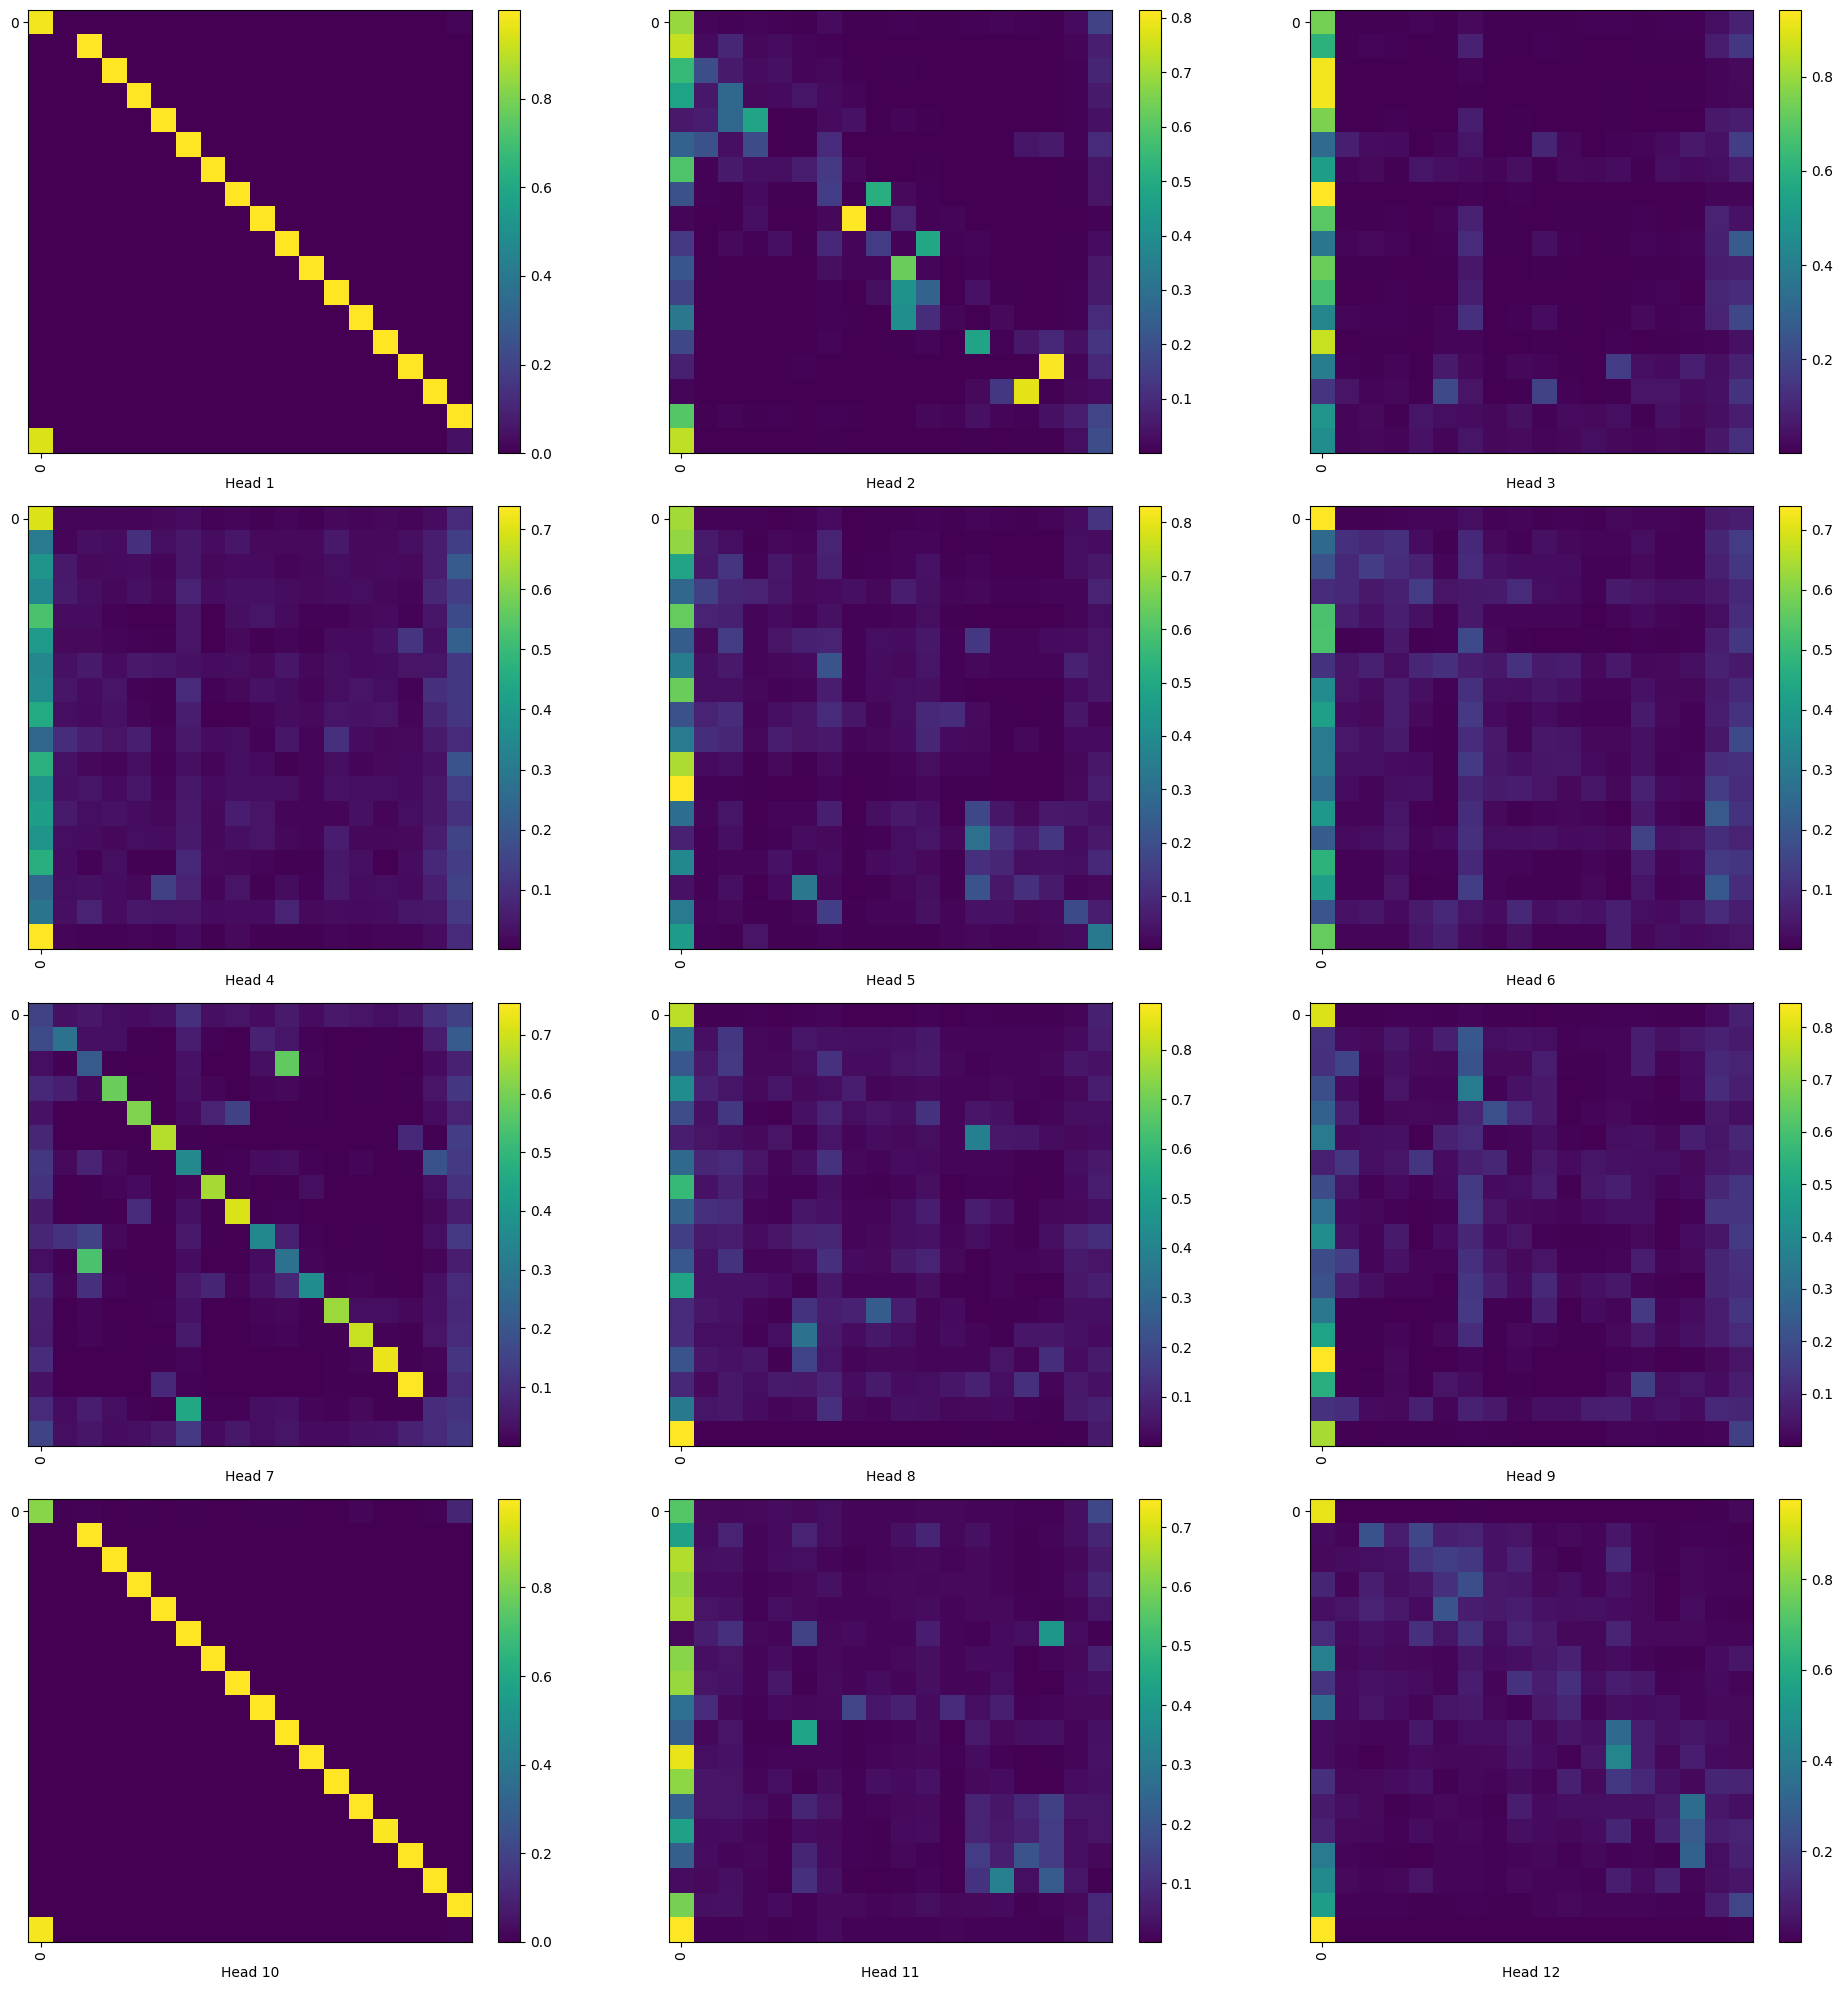

In [75]:
visualize_token2token_scores(output_attentions_all[2].squeeze().detach().cpu().numpy())

###True Negative

In [83]:
# min = 1000000
# best_i = 0
# for i in true["z"]:
#   if len(test_data.iloc[i]["Sentences"]) < min:
#     min = len(test_data.iloc[i]["Sentences"])
#     best_i = i

# print(best_i)


141


In [123]:
import random as rand
# true_negative_index = best_i
true_negative_index = rand.choice(true["z"])
true_negative_sentence = test_data.iloc[true_negative_index]["Sentences"]
print(true_negative_sentence)

SHRIEKER is a Full Moon production. I knew what to expect (very little quality) but I didn't expect this to be as painful as SHRIEKER was to watch.It's just awful. Bad acting, confusing script and direction. Annoying characters I wanted to kill. The whole thing was probably made in one week. I've seen episodes of CHARMED that were more complex and convincing than this cheapie.It has the look and feel of an orphaned episode of a badly conceived TV series no one has ever seen. It was a chore to watch and I could feel my mind getting dimmer and dimmer by the minute. Watching a movie shouldn't be this much hard work.


In [124]:
from transformers import BertTokenizer

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'bert-base-uncased')    # Download vocabulary from S3 and cache
encoded_false_pos_sentence = tokenizer.encode_plus(
                        true_negative_sentence,                       # Sentence to encode
                        add_special_tokens = True,       # Add [CLS] and [SEP] tokens
                        padding = 'max_length',          # Pad sentence to max_length
                        max_length = 512,                 # Max sentence length in tokens
                        truncation = True,               # Truncate longer sentences
                        return_attention_mask = True,    # Return attention mask
                        return_tensors = 'pt'            # Return PyTorch tensors
                  )
sample_tensor = encoded_false_pos_sentence['input_ids']
# print(sample_tensor)

temp = []
attention_temp = []
for e in encoded_false_pos_sentence['input_ids'].detach().numpy()[0]:
  if e == 0:
    break
  temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
temp = [temp]
print(temp)

attention_temp = []
for e in encoded_false_pos_sentence['attention_mask'].detach().numpy()[0]:
  if e == 0:
    break
  attention_temp.append(e)
# print(encoded_false_pos_sentence['input_ids'].detach().numpy()[0])
attention_temp = [attention_temp]
print(attention_temp)
# print(encoded_false_neg_sentence['attention_mask'])

[[101, 24795, 2121, 2003, 1037, 2440, 4231, 2537, 1012, 1045, 2354, 2054, 2000, 5987, 1006, 2200, 2210, 3737, 1007, 2021, 1045, 2134, 1005, 1056, 5987, 2023, 2000, 2022, 2004, 9145, 2004, 24795, 2121, 2001, 2000, 3422, 1012, 2009, 1005, 1055, 2074, 9643, 1012, 2919, 3772, 1010, 16801, 5896, 1998, 3257, 1012, 15703, 3494, 1045, 2359, 2000, 3102, 1012, 1996, 2878, 2518, 2001, 2763, 2081, 1999, 2028, 2733, 1012, 1045, 1005, 2310, 2464, 4178, 1997, 11084, 2098, 2008, 2020, 2062, 3375, 1998, 13359, 2084, 2023, 10036, 2666, 1012, 2009, 2038, 1996, 2298, 1998, 2514, 1997, 2019, 27093, 2792, 1997, 1037, 6649, 10141, 2694, 2186, 2053, 2028, 2038, 2412, 2464, 1012, 2009, 2001, 1037, 16480, 2890, 2000, 3422, 1998, 1045, 2071, 2514, 2026, 2568, 2893, 11737, 5017, 1998, 11737, 5017, 2011, 1996, 3371, 1012, 3666, 1037, 3185, 5807, 1005, 1056, 2022, 2023, 2172, 2524, 2147, 1012, 102]]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


In [125]:
temp = torch.tensor(temp)
attention_temp = torch.tensor(attention_temp)

print(temp)
print(attention_temp)

tensor([[  101, 24795,  2121,  2003,  1037,  2440,  4231,  2537,  1012,  1045,
          2354,  2054,  2000,  5987,  1006,  2200,  2210,  3737,  1007,  2021,
          1045,  2134,  1005,  1056,  5987,  2023,  2000,  2022,  2004,  9145,
          2004, 24795,  2121,  2001,  2000,  3422,  1012,  2009,  1005,  1055,
          2074,  9643,  1012,  2919,  3772,  1010, 16801,  5896,  1998,  3257,
          1012, 15703,  3494,  1045,  2359,  2000,  3102,  1012,  1996,  2878,
          2518,  2001,  2763,  2081,  1999,  2028,  2733,  1012,  1045,  1005,
          2310,  2464,  4178,  1997, 11084,  2098,  2008,  2020,  2062,  3375,
          1998, 13359,  2084,  2023, 10036,  2666,  1012,  2009,  2038,  1996,
          2298,  1998,  2514,  1997,  2019, 27093,  2792,  1997,  1037,  6649,
         10141,  2694,  2186,  2053,  2028,  2038,  2412,  2464,  1012,  2009,
          2001,  1037, 16480,  2890,  2000,  3422,  1998,  1045,  2071,  2514,
          2026,  2568,  2893, 11737,  5017,  1998, 1

In [126]:
# model = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading
# #predict



# #10 layer #0 head of the multihead #first row of that head

# pred = model(temp, attention_temp, output_attentions = "True")

model = torch.hub.load('huggingface/pytorch-transformers', 'modelForSequenceClassification', 'bert-base-uncased', output_attentions=True)  # Update configuration during loading




#10 layer #0 head of the multihead #first row of that head

pred = model(temp, attention_temp)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights 

In [130]:
output_attentions_all = pred[-1]
heads = output_attentions_all[0].squeeze().detach().cpu().numpy()

max_sum = -10000
best_layer = 0
i = 0
for e in heads:
  # print(e[0])
  if i == 2:
    best_layer = e[:, 0]
  i += 1

for a,b in zip(tokenizer.convert_ids_to_tokens(temp[0]), best_layer.flatten()):
  if(b > 0.35):
    print(a,b)
# tokenizer.convert_ids_to_tokens(temp[0])

shriek 0.4526908
i 0.39855406
painful 0.3753176
was 0.36692616
annoying 0.46669206
probably 0.45514855
convincing 0.4055673
cheap 0.56285536
conceived 0.49867246
tv 0.51979345
seen 0.42640826
dim 0.44265023


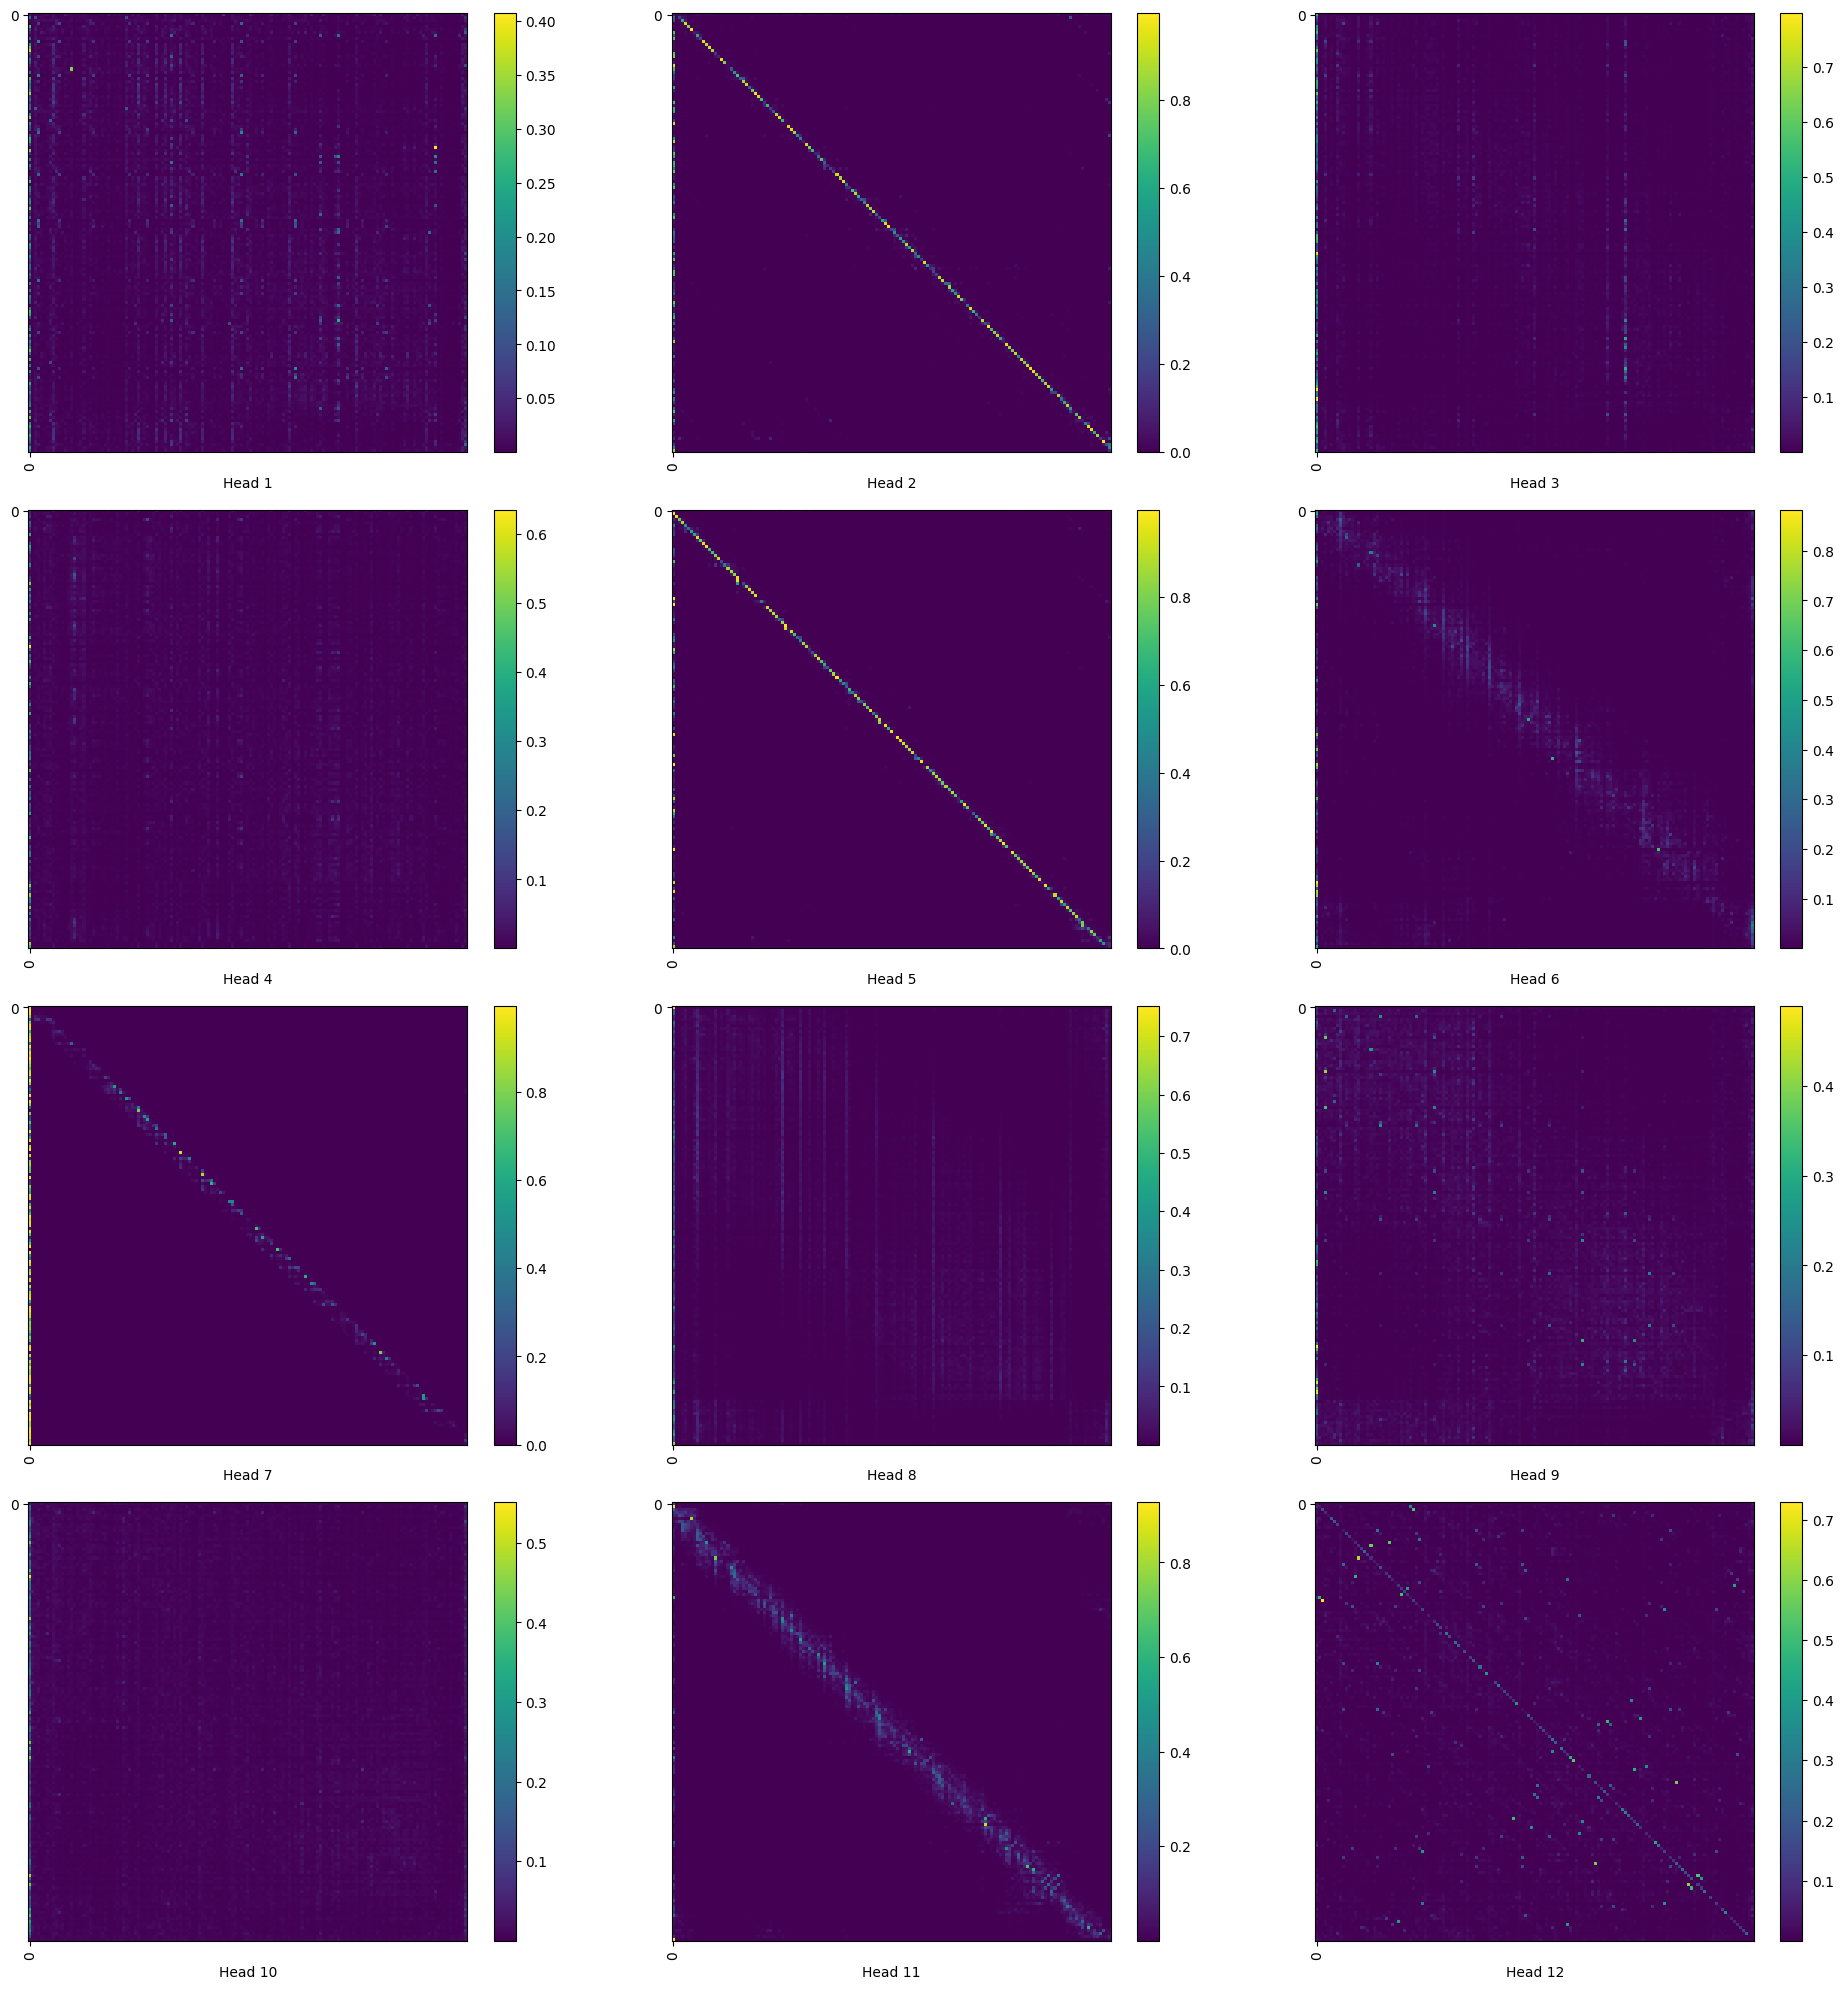

In [129]:
visualize_token2token_scores(output_attentions_all[1].squeeze().detach().cpu().numpy())

##Second Expirement: implemeting head-tail

In [55]:
# head+tail: empirically select the first 128 and the last 382 tokens.

In [182]:
train_tokens = []
for t in train_texts:
    tokens = tokenizer.tokenize(t)
    if len(tokens) > 510:
        tokens = tokens[:128] + tokens[-382:]
    else:
        tokens = tokens[:128]
    train_tokens.append(['[CLS]'] + tokens + ['[SEP]'])

test_tokens = []
for t in test_texts:
    tokens = tokenizer.tokenize(t)
    if len(tokens) > 510:
        tokens = tokens[:128] + tokens[-382:]
    else:
        tokens = tokens[:128]
    test_tokens.append(['[CLS]'] + tokens + ['[SEP]'])

from keras_preprocessing.sequence import pad_sequences
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape
train_y = np.array(train_labels) == 1
test_y = np.array(test_labels) == 1
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()     # running BERT on CUDA_GPU
x = torch.tensor(train_tokens_ids[:3]).to(device)
y = bert_clf.bert(x)
pooled = y.pooler_output
x.shape, pooled.shape
y = bert_clf(x)
y.cpu().detach().numpy()        # kinda Garbage Collector to free up used and cache space
y, x, pooled = None, None, None
torch.cuda.empty_cache()     # Clearing Cache space for fresh Model run

# Setting hyper-parameters

BATCH_SIZE = 4
EPOCHS = 10


train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)


from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)
param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

from torch.optim import Adam
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()

        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()
        

        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / BATCH_SIZE, train_loss / (step_num + 1)))

bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])
from sklearn.metrics import classification_report
print(classification_report(test_y, bert_predicted))	








Epoch:  10
499/500.0 loss: 0.03230513564299326 
              precision    recall  f1-score   support

       False       0.87      0.84      0.85       250
        True       0.84      0.88      0.86       250

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



31 41
209 219


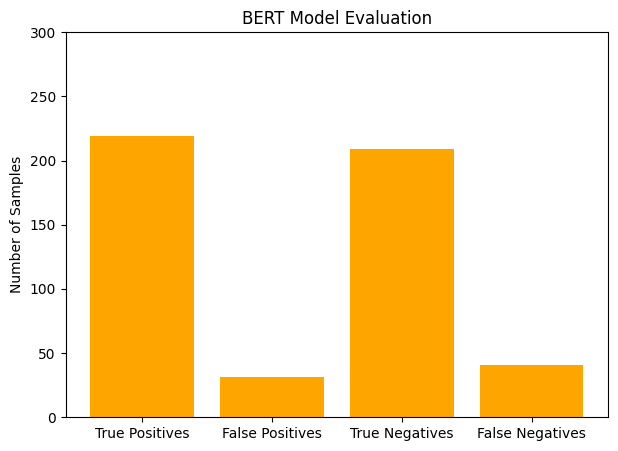

In [183]:


wrong = {"z_o" : [], "o_z": []}
true = {"z": [], "o": []}
i = 0
for a,b in zip(bert_predicted,test_y):
  if a == 0 and b == 1: #false positive
    wrong["z_o"].append(i)
  elif a == 1 and b == 0: #false negative
    wrong["o_z"].append(i)
  elif a == 0 and b == 0:
    true["z"].append(i)
  elif a == 1 and b == 1:
    true["o"].append(i)
  i += 1
print(len(wrong["z_o"]), len(wrong["o_z"]))
print(len(true["z"]), len(true["o"]))

import matplotlib.pyplot as plt

# Data
false_positives = len(wrong["z_o"])
false_negatives = len(wrong["o_z"])
true_positives = len(true["o"])
true_negatives = len(true["z"])

# Plotting
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
values = [true_positives, false_positives, true_negatives, false_negatives]
colors = ['orange', 'orange', 'orange', 'orange'] # Set the color of all bars to orange
plt.bar(labels, values, color=colors)

# Customization
plt.title('BERT Model Evaluation')
plt.ylabel('Number of Samples')
plt.ylim(top=300) # Set the y-axis limit to avoid overlapping with title
plt.show()
